Part 1. Data Cleaning
1) Understanding the data

In [25]:
# Importing all libraries that I use in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

In [26]:
# Creating a dataframe and importing S&P 1500 score
df = pd.read_csv("./S&P1500_Raw Dataset_Data Analytics in Business Assignment_2021.csv")
df.count()

Ticker                              4518
Name                                4518
Year                                4518
ISIN Number                         4518
SIC Code                            4437
GICS Industry                       4518
Country or Territory of Domicile    4518
Number of Employees                 4315
Total Assets                        4452
R&D Expense                         3503
R&D Expense Adjusted                3211
Operating Expenses R&D              3209
Cash and Cash Equivalents           4452
Environmental Disclosure Score      3179
Social Disclosure Score             4168
Governance Disclosure Score         4371
Tobin's Q Ratio                     4362
Return on Assets                    4410
Return on Common Equity             4232
Gross Margin                        3348
dtype: int64

In [27]:
# Checking the number of variables
df.shape[1]

20

In [28]:
# Checking how many industries are involves
len(df["SIC Code"].unique())

326

2) Choosing biopharmaceutical companird involving Pfizer as the target

In [29]:
# Creating a new dataframe and narrowing down the range in which only include the 4-digit SIC Code of 2834 or 2836

df_pharm_company = df.loc[(df["SIC Code"] == 2834) | (df["SIC Code"] == 2836)]
df_pharm_company.shape[0]

156

In [30]:
# Checking types of variables

df_pharm_company.dtypes

Ticker                               object
Name                                 object
Year                                  int64
ISIN Number                          object
SIC Code                            float64
GICS Industry                         int64
Country or Territory of Domicile     object
Number of Employees                 float64
Total Assets                        float64
R&D Expense                         float64
R&D Expense Adjusted                float64
Operating Expenses R&D              float64
Cash and Cash Equivalents           float64
Environmental Disclosure Score      float64
Social Disclosure Score             float64
Governance Disclosure Score         float64
Tobin's Q Ratio                     float64
Return on Assets                    float64
Return on Common Equity             float64
Gross Margin                        float64
dtype: object

In [31]:
# Choosing variables that I need
df_pharm_company = pd.DataFrame(df_pharm_company, columns = ["Ticker", "Name", "Year", "Country or Territory of Domicile",
"Number of Employees", "Total Assets", "R&D Expense Adjusted", "Environmental Disclosure Score", "Tobin's Q Ratio", "Return on Assets"])

df_pharm_company.head()

,Ticker,Name,Year,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense Adjusted,Environmental Disclosure Score,Tobin's Q Ratio,Return on Assets
28,JNJ UN Equity,Johnson & Johnson,2016,US,126400.0,141208.000,9095.000,61.2403,2.7095,12.0458
31,MRK UN Equity,Merck & Co Inc,2016,US,68000.0,95377.000,9760.000,58.1395,2.2763,3.9786
34,PFE UN Equity,Pfizer Inc,2016,US,96500.0,171615.000,7841.000,44.1860,1.8020,4.2567
47,CYTK UW Equity,Cytokinetics Inc,2016,US,127.0,170.142,59.897,NaN,3.3480,11.5306
67,ABT UN Equity,Abbott Laboratories,2016,US,75000.0,52666.000,1422.000,54.2636,1.6842,2.9815


In [32]:
# Adjusting the names of variables that I need

df_pharm_company_new = df_pharm_company.rename(columns = {"Ticker":"TICKER", "Name":"NAME", "Year":"YEAR",
"Country or Territory of Domicile":"CNTRY_OF_DOMICILE", "Number of Employees": "NUM_OF_EMPLOYEES", 
"Total Assets": "BS_TOT_ASSET", "R&D Expense Adjusted": "IS_OPEX_R&D",
"Environmental Disclosure Score": "ENVIRON_DISCLOSURE_SCORE", "Tobin's Q Ratio": "TOBIN_Q_RATIO", "Return on Assets": "RETURN_ON_ASSET"})

df_pharm_company_new.head()

,TICKER,NAME,YEAR,CNTRY_OF_DOMICILE,NUM_OF_EMPLOYEES,BS_TOT_ASSET,IS_OPEX_R&D,ENVIRON_DISCLOSURE_SCORE,TOBIN_Q_RATIO,RETURN_ON_ASSET
28,JNJ UN Equity,Johnson & Johnson,2016,US,126400.0,141208.000,9095.000,61.2403,2.7095,12.0458
31,MRK UN Equity,Merck & Co Inc,2016,US,68000.0,95377.000,9760.000,58.1395,2.2763,3.9786
34,PFE UN Equity,Pfizer Inc,2016,US,96500.0,171615.000,7841.000,44.1860,1.8020,4.2567
47,CYTK UW Equity,Cytokinetics Inc,2016,US,127.0,170.142,59.897,NaN,3.3480,11.5306
67,ABT UN Equity,Abbott Laboratories,2016,US,75000.0,52666.000,1422.000,54.2636,1.6842,2.9815


In [33]:
# Removing the observations with missing values

df_pharm_company_new = df_pharm_company_new.dropna()
df_pharm_company_new.count()

TICKER                      56
NAME                        56
YEAR                        56
CNTRY_OF_DOMICILE           56
NUM_OF_EMPLOYEES            56
BS_TOT_ASSET                56
IS_OPEX_R&D                 56
ENVIRON_DISCLOSURE_SCORE    56
TOBIN_Q_RATIO               56
RETURN_ON_ASSET             56
dtype: int64

In [34]:
# Sorting the dataframe based on Ticker and Year

df_pharm_company_new = df_pharm_company_new.sort_values(by = ["TICKER", "YEAR"])
df_pharm_company_new.head(4)

,TICKER,NAME,YEAR,CNTRY_OF_DOMICILE,NUM_OF_EMPLOYEES,BS_TOT_ASSET,IS_OPEX_R&D,ENVIRON_DISCLOSURE_SCORE,TOBIN_Q_RATIO,RETURN_ON_ASSET
1027,ABBV UN Equity,AbbVie Inc,2016,US,30000.0,66099.0,4152.0,31.7829,2.4386,9.9925
2533,ABBV UN Equity,AbbVie Inc,2017,US,29000.0,70786.0,4829.0,33.3333,3.1032,7.7569
4039,ABBV UN Equity,AbbVie Inc,2018,US,30000.0,59352.0,5093.0,39.5349,3.4393,8.7400
67,ABT UN Equity,Abbott Laboratories,2016,US,75000.0,52666.0,1422.0,54.2636,1.6842,2.9815


Part 2. Descriptive Analytics

1) Demenstrating the financial aspects of Pfizer and other competitors.

In [35]:
#Checking the left companies

df_pharm_company_new["NAME"].value_counts()

AbbVie Inc                       3
Johnson & Johnson                3
Viatris Inc                      3
Regeneron Pharmaceuticals Inc    3
Perrigo Co PLC                   3
Pfizer Inc                       3
Abbott Laboratories              3
Eli Lilly & Co                   3
Merck & Co Inc                   3
Gilead Sciences Inc              3
Endo International PLC           3
Bristol-Myers Squibb Co          3
Biogen Inc                       3
Amgen Inc                        3
Zoetis Inc                       3
Organogenesis Holdings Inc       2
Emergent BioSolutions Inc        2
Bio-Techne Corp                  2
United Therapeutics Corp         2
Vertex Pharmaceuticals Inc       2
Moderna Inc                      1
Name: NAME, dtype: int64

In [36]:
# Checking how many companies are envolved in the evaluation

len(df_pharm_company_new["NAME"].unique())

21

In [37]:
# Locations of Pharmaceuticals in the world

df_pharm_company_new.groupby("CNTRY_OF_DOMICILE").NAME.nunique()

CNTRY_OF_DOMICILE
IE     2
US    19
Name: NAME, dtype: int64

In [38]:
# Identifying which two companies are in Ireland

df_pharm_company_new.loc[df_pharm_company_new["CNTRY_OF_DOMICILE"] == "IE", "NAME"].unique()

array(['Endo International PLC', 'Perrigo Co PLC'], dtype=object)

In [39]:
df_pharm_company_new.loc[df_pharm_company_new["CNTRY_OF_DOMICILE"] == "US", "NAME"].unique()

array(['AbbVie Inc', 'Abbott Laboratories', 'Amgen Inc', 'Biogen Inc',
       'Bristol-Myers Squibb Co', 'Emergent BioSolutions Inc',
       'Gilead Sciences Inc', 'Johnson & Johnson', 'Eli Lilly & Co',
       'Merck & Co Inc', 'Moderna Inc', 'Organogenesis Holdings Inc',
       'Pfizer Inc', 'Regeneron Pharmaceuticals Inc', 'Bio-Techne Corp',
       'United Therapeutics Corp', 'Vertex Pharmaceuticals Inc',
       'Viatris Inc', 'Zoetis Inc'], dtype=object)

In [40]:
# Identifying where Pfizer is

df_pharm_company_new.loc[df_pharm_company_new["NAME"] == "Pfizer Inc", "CNTRY_OF_DOMICILE"].unique()

array(['US'], dtype=object)

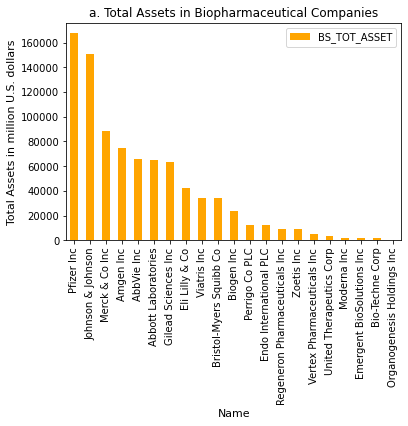

<Figure size 1872x1152 with 0 Axes>

In [41]:
# Calculating annual assets among those companies and visulising data

pharm_ast_mean = df_pharm_company_new.groupby("NAME")["BS_TOT_ASSET"].mean().reset_index().sort_values("BS_TOT_ASSET", ascending = False)
pharm_ast_mean.plot(x = "NAME", kind = "bar", color = "Orange")

plt.title("a. Total Assets in Biopharmaceutical Companies")
plt.xlabel("Name", fontsize = 11)
plt.ylabel("Total Assets in million U.S. dollars", fontsize = 11)
plt.figure(figsize = (26, 16))

plt.show()

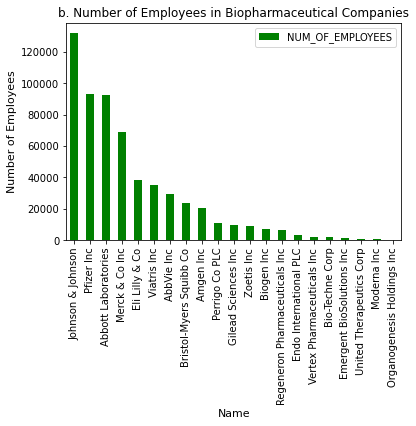

<Figure size 1872x1152 with 0 Axes>

In [42]:
# Calculating annual employees among those companies and visulising data

pharm_epe_mean = df_pharm_company_new.groupby("NAME")["NUM_OF_EMPLOYEES"].mean().reset_index().sort_values("NUM_OF_EMPLOYEES", ascending = False)
pharm_epe_mean.plot(x = "NAME", kind = "bar", color = "Green")

plt.title("b. Number of Employees in Biopharmaceutical Companies")
plt.xlabel("Name", fontsize = 11)
plt.ylabel("Number of Employees", fontsize = 11)
plt.figure(figsize = (26, 16))

plt.show()

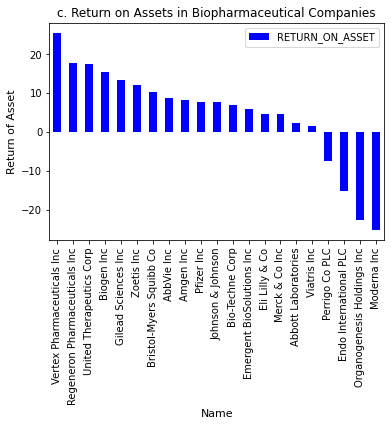

<Figure size 1872x1152 with 0 Axes>

In [43]:
# Calculating return asset among those companies and visulising data

pharm_RAst_mean = df_pharm_company_new.groupby("NAME")["RETURN_ON_ASSET"].mean().reset_index().sort_values("RETURN_ON_ASSET", ascending = False)
pharm_RAst_mean.plot(x = "NAME", kind = "bar", color = "Blue")

plt.title("c. Return on Assets in Biopharmaceutical Companies")
plt.xlabel("Name", fontsize = 11)
plt.ylabel("Return of Asset", fontsize = 11)
plt.figure(figsize = (26, 16))

plt.show()

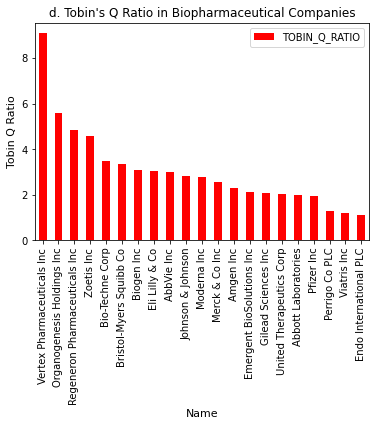

<Figure size 1872x1152 with 0 Axes>

In [44]:
# Calculting Tobin's Q Ratio among those companies and visulising data

pharm_Q_mean = df_pharm_company_new.groupby("NAME")["TOBIN_Q_RATIO"].mean().reset_index().sort_values("TOBIN_Q_RATIO", ascending = False)
pharm_Q_mean.plot(x = "NAME", kind = "bar", color = "Red")

plt.title("d. Tobin's Q Ratio in Biopharmaceutical Companies")
plt.xlabel("Name", fontsize = 11)
plt.ylabel("Tobin Q Ratio", fontsize = 11)
plt.figure(figsize = (26, 16))

plt.show()

2) Showing development trend of Pfizer 

In [45]:
# Creating a new dataframe for Pfizer

df_Pfizer = df_pharm_company_new.loc[df_pharm_company_new["NAME"] == "Pfizer Inc"]
df_Pfizer

,TICKER,NAME,YEAR,CNTRY_OF_DOMICILE,NUM_OF_EMPLOYEES,BS_TOT_ASSET,IS_OPEX_R&D,ENVIRON_DISCLOSURE_SCORE,TOBIN_Q_RATIO,RETURN_ON_ASSET
34,PFE UN Equity,Pfizer Inc,2016,US,96500.0,171615.0,7841.0,44.1860,1.8020,4.2567
1540,PFE UN Equity,Pfizer Inc,2017,US,90200.0,171797.0,7653.0,49.6124,1.8456,12.4096
3046,PFE UN Equity,Pfizer Inc,2018,US,92400.0,159422.0,7962.0,49.6124,2.1677,6.7345


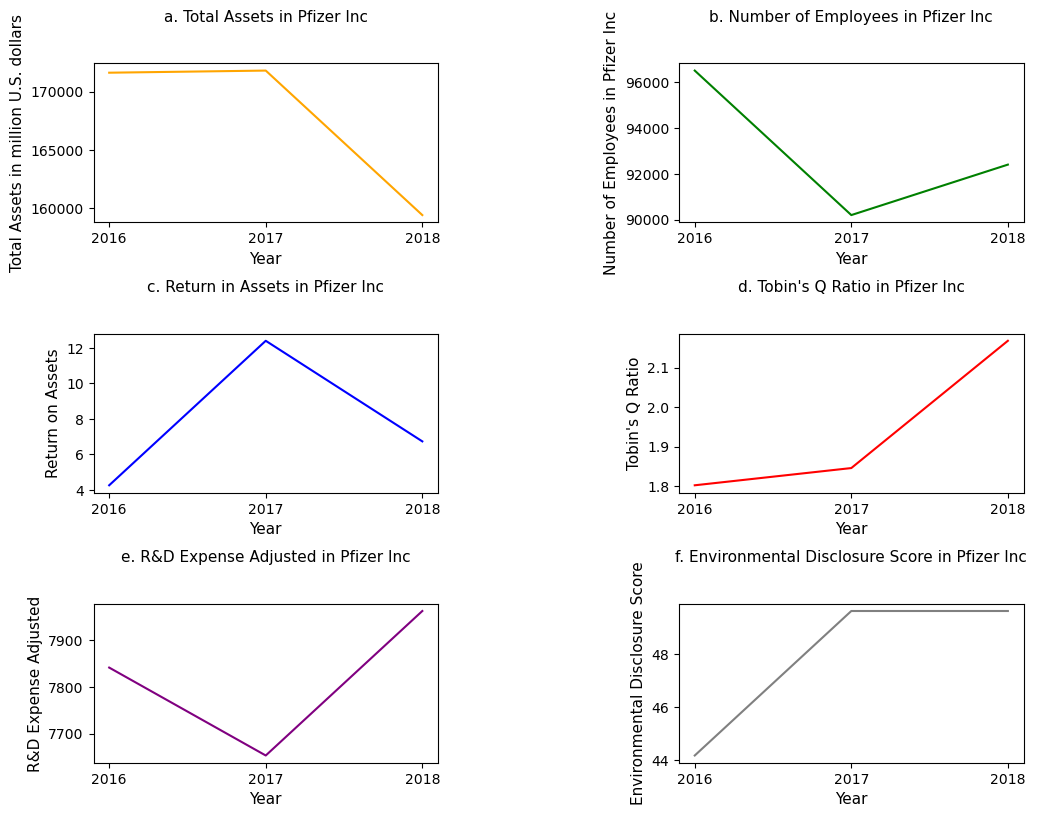

In [48]:
# Describing the developing trend of Pfizer from 2016 - 2018

fig2 = plt.figure()
fig2.set_size_inches(12, 20)
fig2.set_dpi(100)
axes1 = fig2.add_subplot(6, 2, 1)
axes2 = fig2.add_subplot(6, 2, 2)
axes3 = fig2.add_subplot(6, 2, 3)
axes4 = fig2.add_subplot(6, 2, 4)
axes5 = fig2.add_subplot(6, 2, 5)
axes6 = fig2.add_subplot(6, 2, 6)

axes1.plot(df_Pfizer["YEAR"], df_Pfizer["BS_TOT_ASSET"], color = "orange")
axes2.plot(df_Pfizer["YEAR"], df_Pfizer["NUM_OF_EMPLOYEES"], color = "green")
axes3.plot(df_Pfizer["YEAR"], df_Pfizer["RETURN_ON_ASSET"], color = "blue")
axes4.plot(df_Pfizer["YEAR"], df_Pfizer["TOBIN_Q_RATIO"], color = "red")
axes5.plot(df_Pfizer["YEAR"], df_Pfizer["IS_OPEX_R&D"], color = "purple")
axes6.plot(df_Pfizer["YEAR"], df_Pfizer["ENVIRON_DISCLOSURE_SCORE"], color = "grey")

axes1.set_title("a. Total Assets in Pfizer Inc", pad = 30, fontsize = 11)
axes1.set_xticks([2016, 2017, 2018])
axes1.set_xlabel("Year", fontsize = 11)
axes1.set_ylabel("Total Assets in million U.S. dollars", fontsize = 11)

axes2.set_title("b. Number of Employees in Pfizer Inc", pad = 30, fontsize = 11)
axes2.set_xticks([2016, 2017, 2018])
axes2.set_xlabel("Year", fontsize = 11)
axes2.set_ylabel("Number of Employees in Pfizer Inc", fontsize = 11)

axes3.set_title("c. Return in Assets in Pfizer Inc", pad = 30, fontsize = 11)
axes3.set_xticks([2016, 2017, 2018])
axes3.set_xlabel("Year", fontsize = 11)
axes3.set_ylabel("Return on Assets", fontsize = 11)

axes4.set_title("d. Tobin's Q Ratio in Pfizer Inc", pad = 30, fontsize = 11)
axes4.set_xticks([2016, 2017, 2018])
axes4.set_xlabel("Year", fontsize = 11)
axes4.set_ylabel("Tobin's Q Ratio", fontsize = 11)

axes5.set_title("e. R&D Expense Adjusted in Pfizer Inc", pad = 30, fontsize = 11)
axes5.set_xticks([2016, 2017, 2018])
axes5.set_xlabel("Year", fontsize = 11)
axes5.set_ylabel("R&D Expense Adjusted", fontsize = 11)

axes6.set_title("f. Environmental Disclosure Score in Pfizer Inc", pad = 30, fontsize = 11)
axes6.set_xticks([2016, 2017, 2018])
axes6.set_xlabel("Year", fontsize = 11)
axes6.set_ylabel("Environmental Disclosure Score", fontsize = 11)

plt.subplots_adjust(wspace = 0.7, hspace = 0.7)
plt.show()

Part 3 Explore the relationship between ESG scores and total assets

In [51]:
# Using the whole dataframe to explore the relationship between environmental disclosure score and financial performance
# Choosing the coloumns that I need and changeing names of variables
# Deleting rows with missing value

df_all = pd.DataFrame(df, columns = ["Ticker", "Name", "Year", "Number of Employees", "Total Assets",
"Environmental Disclosure Score", "Governance Disclosure Score", "Social Disclosure Score"])

df_all = df_all.rename(columns = {"Ticker":"TICKER", "Name": "Name", "Year":"YEAR", "Total Assets":"BS_TOT_ASSET",
                                   "Environmental Disclosure Score": "ENVIRON_DISCLOSURE_SCORE",
                                   "Social Disclosure Score": "SOCIAL_DISCLOSURE_SCORE",
                                   "Governance Disclosure Score": "GOVNCE_DISCLOSURE_SCORE"})
    
df_all = df_all.dropna()
df_all.count()

TICKER                      3134
Name                        3134
YEAR                        3134
Number of Employees         3134
BS_TOT_ASSET                3134
ENVIRON_DISCLOSURE_SCORE    3134
GOVNCE_DISCLOSURE_SCORE     3134
SOCIAL_DISCLOSURE_SCORE     3134
dtype: int64

In [52]:
# Sorting out and lagging the value of return on assets and other relevant financial factors
#logging total assets

df_all = df_all.sort_values(by = ["TICKER", "YEAR"])
df_all["ENVIRON_DISCLOSURE_SCORE_Lagged"] = df_all.groupby("TICKER")["ENVIRON_DISCLOSURE_SCORE"].shift(1)
df_all["SOCIAL_DISCLOSURE_SCORE_Lagged"] = df_all.groupby("TICKER")["SOCIAL_DISCLOSURE_SCORE"].shift(1)
df_all["GOVNCE_DISCLOSURE_SCORE_Lagged"] = df_all.groupby("TICKER")["GOVNCE_DISCLOSURE_SCORE"].shift(1)

df_all["Log_BS_TOT_ASSET"] = np.log(df_all["BS_TOT_ASSET"])

df_all = df_all.dropna()
df_all.count()

TICKER                             1984
Name                               1984
YEAR                               1984
Number of Employees                1984
BS_TOT_ASSET                       1984
ENVIRON_DISCLOSURE_SCORE           1984
GOVNCE_DISCLOSURE_SCORE            1984
SOCIAL_DISCLOSURE_SCORE            1984
ENVIRON_DISCLOSURE_SCORE_Lagged    1984
SOCIAL_DISCLOSURE_SCORE_Lagged     1984
GOVNCE_DISCLOSURE_SCORE_Lagged     1984
Log_BS_TOT_ASSET                   1984
dtype: int64

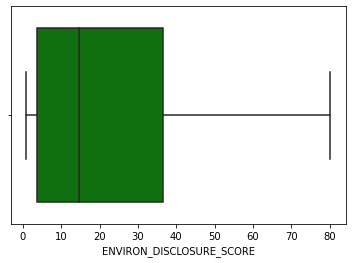

In [53]:
# Checking and deleting outliers

boxplot1 = sns.boxplot(x = "ENVIRON_DISCLOSURE_SCORE", data = df_all, color = "green")

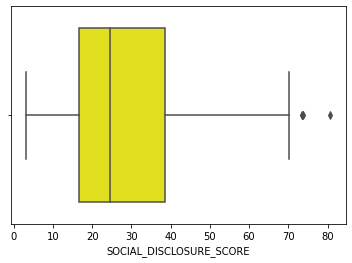

In [54]:
boxplot2 = sns.boxplot(x = "SOCIAL_DISCLOSURE_SCORE", data = df_all, color = "yellow")

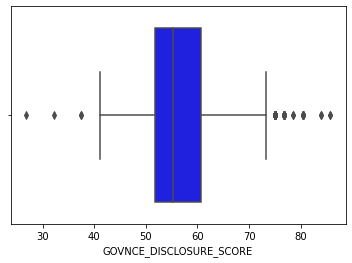

In [55]:
boxplot3 = sns.boxplot(x = "GOVNCE_DISCLOSURE_SCORE", data = df_all, color = "blue")

In [56]:
a1 = df_all["ENVIRON_DISCLOSURE_SCORE"].mean()
b1 = df_all["ENVIRON_DISCLOSURE_SCORE"].std()
(a1 + 3*b1, a1 - 3*b1)

(77.82526002434611, -35.55008230257195)

In [58]:
df_all[(df_all["ENVIRON_DISCLOSURE_SCORE"] > (a1 + 3*b1))|(df_all["ENVIRON_DISCLOSURE_SCORE"] < (a1 - 3*b1))]["ENVIRON_DISCLOSURE_SCORE"]



1581    80.1653
3087    80.1653
Name: ENVIRON_DISCLOSURE_SCORE, dtype: float64

In [59]:
a2 = df_all["SOCIAL_DISCLOSURE_SCORE"].mean()
b2 = df_all["SOCIAL_DISCLOSURE_SCORE"].std()
(a2 + 3*b2, a2 - 3*b2)

(72.57874132752994, -17.515218242852868)

In [60]:
df_all[(df_all["SOCIAL_DISCLOSURE_SCORE"] > (a2 + 3*b2))|(df_all["SOCIAL_DISCLOSURE_SCORE"] < (a2 - 3*b2))]["SOCIAL_DISCLOSURE_SCORE"]


3165    73.6842
1581    73.4375
3087    73.4375
4130    80.7018
Name: SOCIAL_DISCLOSURE_SCORE, dtype: float64

In [61]:
a3 = df_all["GOVNCE_DISCLOSURE_SCORE"].mean()
b3 = df_all["GOVNCE_DISCLOSURE_SCORE"].std()
(a3 + 3*b3, a3 - 3*b3)

(79.52623367766367, 36.03753910459202)

In [62]:
df_all[(df_all["GOVNCE_DISCLOSURE_SCORE"] > (a3 + 3*b3))|(df_all["GOVNCE_DISCLOSURE_SCORE"] < (a3 - 3*b3))]["GOVNCE_DISCLOSURE_SCORE"]


1575    80.3571
3081    80.3571
1539    85.7143
3045    85.7143
3115    80.3571
1841    80.3571
3347    80.3571
1832    80.3571
3338    80.3571
1509    32.1429
4145    26.7857
1512    80.3571
3018    80.3571
1846    83.9286
3352    83.9286
Name: GOVNCE_DISCLOSURE_SCORE, dtype: float64

In [63]:
df_no_outliers = df_all.drop([1581, 3087, 3165, 4130,
                              1575, 3081, 1539, 3045, 3115, 1841, 3347, 1832, 3338, 1509, 4145, 1512, 3018, 1846, 3352])

df_no_outliers.count()

TICKER                             1965
Name                               1965
YEAR                               1965
Number of Employees                1965
BS_TOT_ASSET                       1965
ENVIRON_DISCLOSURE_SCORE           1965
GOVNCE_DISCLOSURE_SCORE            1965
SOCIAL_DISCLOSURE_SCORE            1965
ENVIRON_DISCLOSURE_SCORE_Lagged    1965
SOCIAL_DISCLOSURE_SCORE_Lagged     1965
GOVNCE_DISCLOSURE_SCORE_Lagged     1965
Log_BS_TOT_ASSET                   1965
dtype: int64

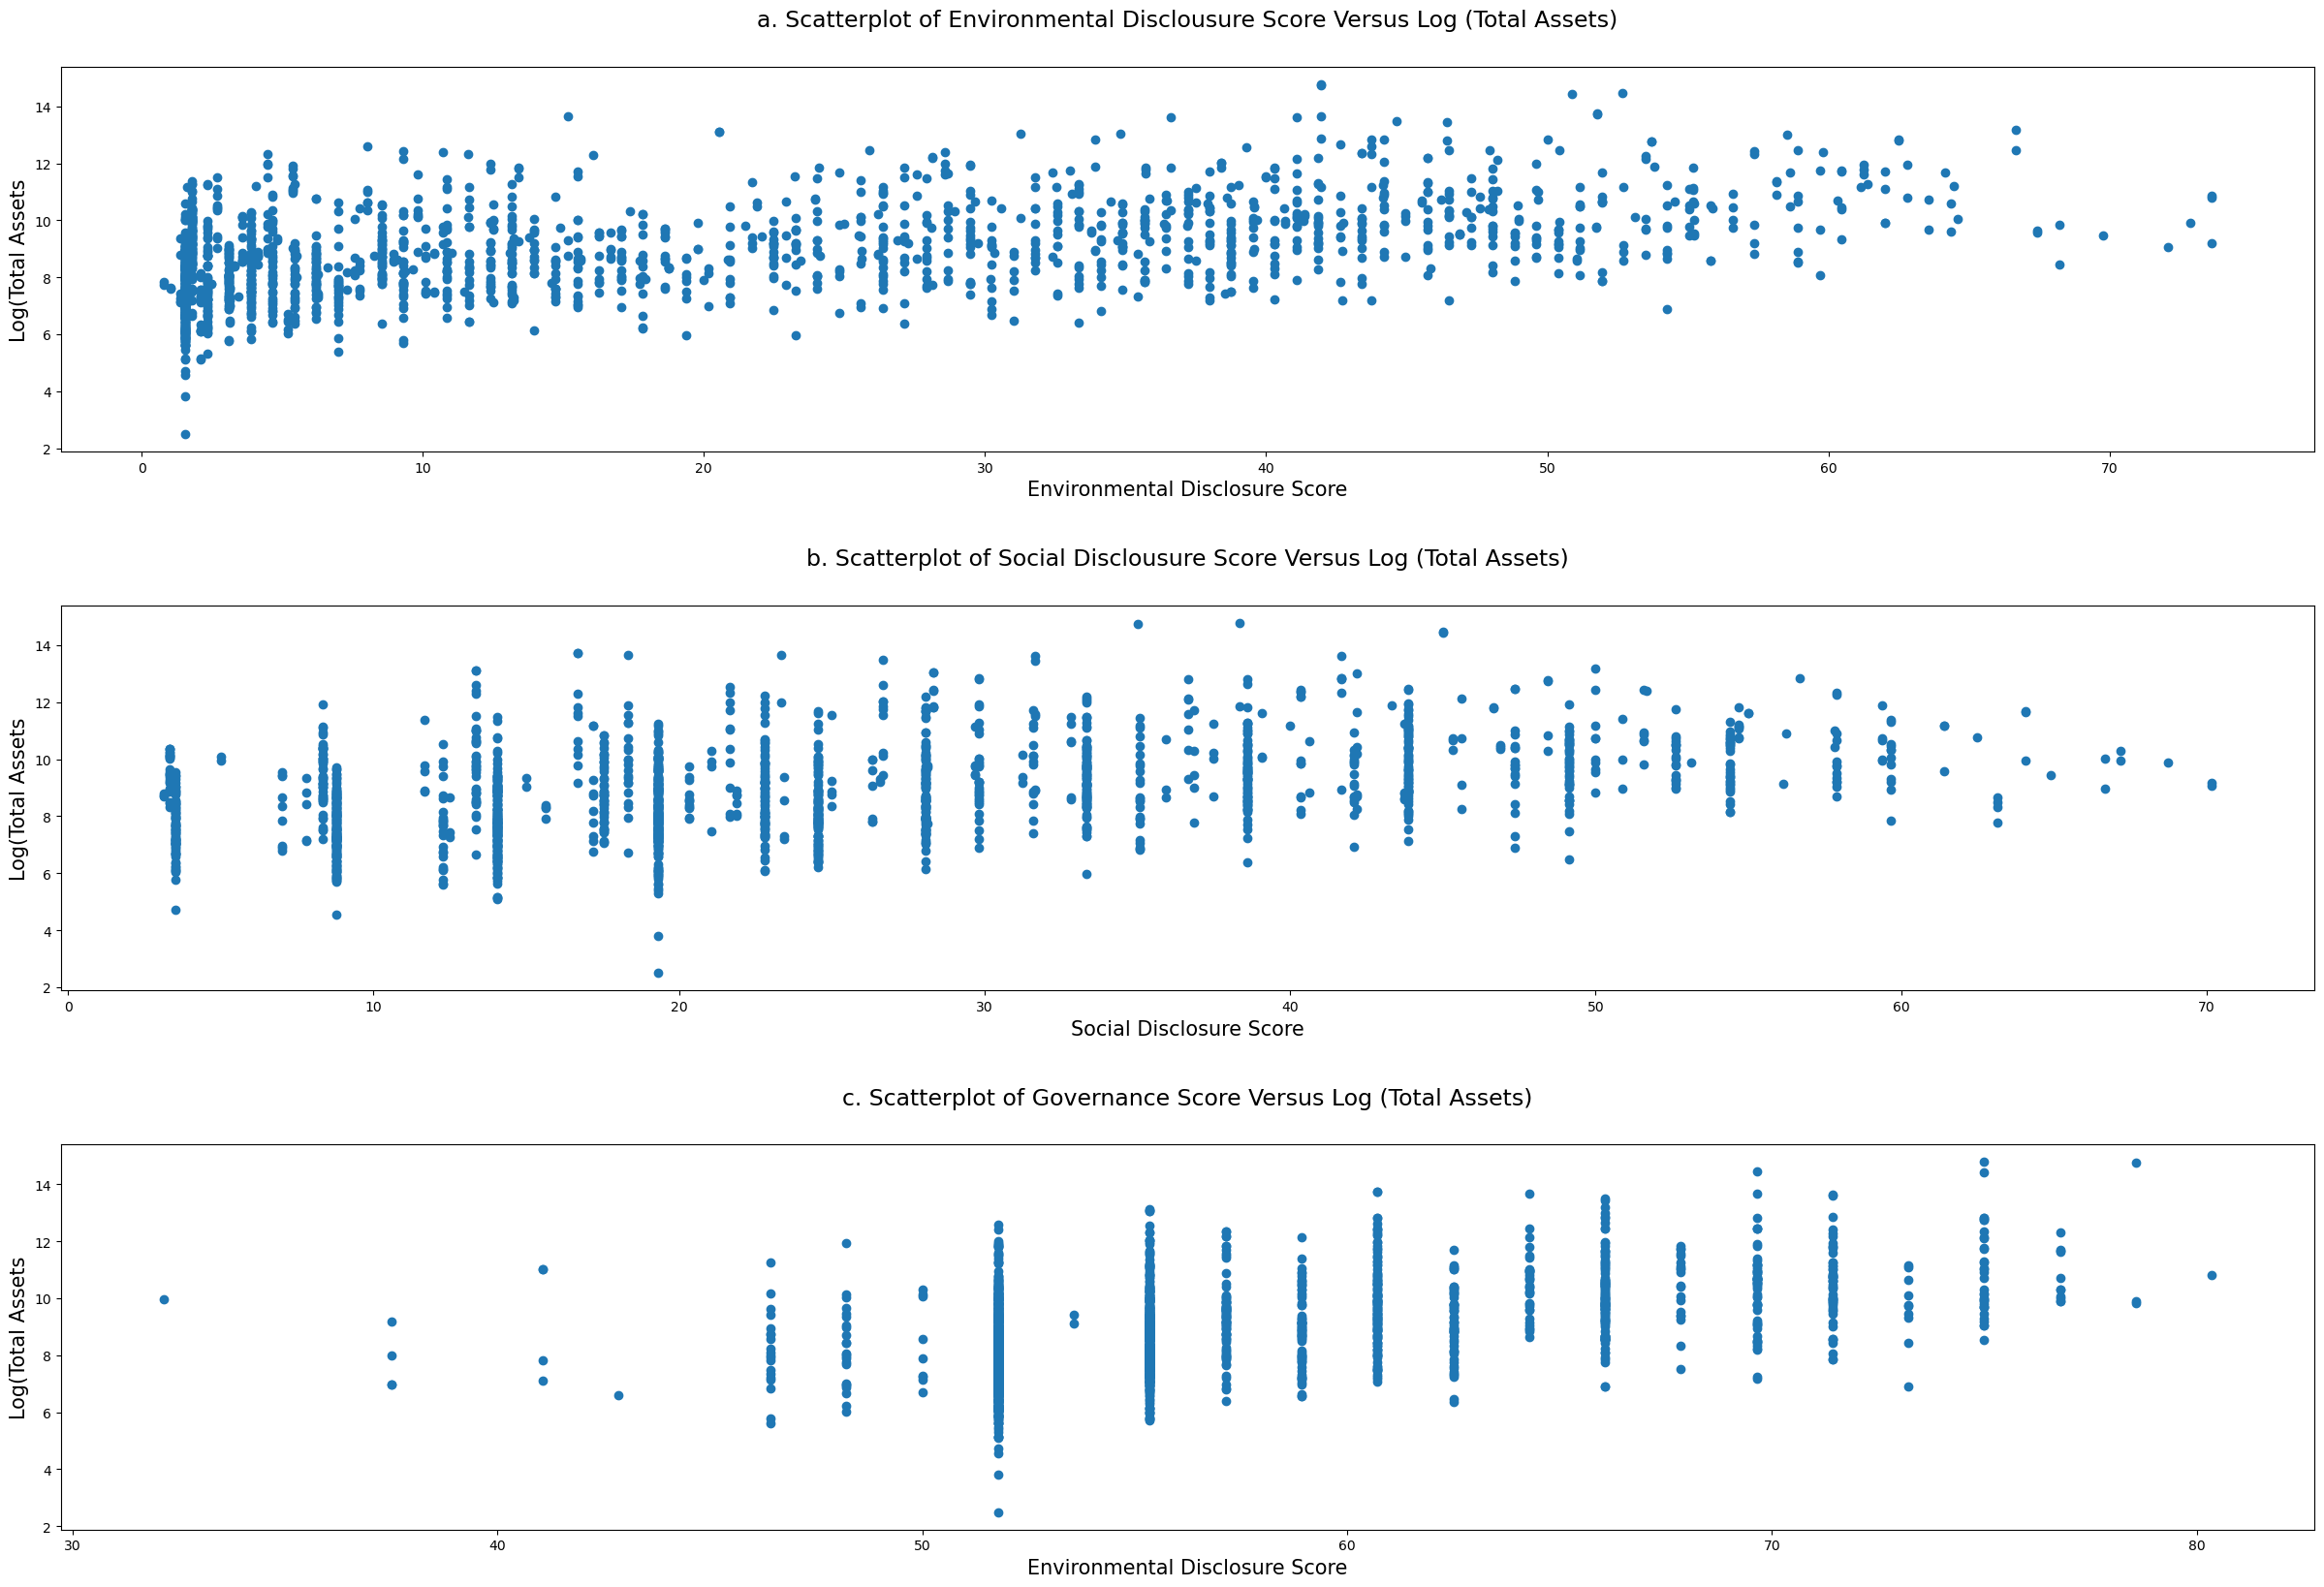

In [65]:
# Illustrating the scatterplots for ESG score and log(total assets)

fig3 = plt.figure()
fig3.set_size_inches(30, 20)
fig3.set_dpi(100)

axes1 = fig3.add_subplot(3, 1, 1)
axes2 = fig3.add_subplot(3, 1, 2)
axes3 = fig3.add_subplot(3, 1, 3)

axes1.plot(df_no_outliers["ENVIRON_DISCLOSURE_SCORE_Lagged"], df_no_outliers["Log_BS_TOT_ASSET"], "o")
axes2.plot(df_no_outliers["SOCIAL_DISCLOSURE_SCORE_Lagged"], df_no_outliers["Log_BS_TOT_ASSET"], "o")
axes3.plot(df_no_outliers["GOVNCE_DISCLOSURE_SCORE_Lagged"], df_no_outliers["Log_BS_TOT_ASSET"], "o")

axes1.set_title("a. Scatterplot of Environmental Disclousure Score Versus Log (Total Assets)", pad = 30, fontsize = 17)
axes1.set_xlabel("Environmental Disclosure Score", fontsize = 15)
axes1.set_ylabel("Log(Total Assets", fontsize = 15)

axes2.set_title("b. Scatterplot of Social Disclousure Score Versus Log (Total Assets)", pad = 30, fontsize = 17)
axes2.set_xlabel("Social Disclosure Score", fontsize = 15)
axes2.set_ylabel("Log(Total Assets", fontsize = 15)

axes3.set_title("c. Scatterplot of Governance Score Versus Log (Total Assets)", pad = 30, fontsize = 17)
axes3.set_xlabel("Environmental Disclosure Score", fontsize = 15)
axes3.set_ylabel("Log(Total Assets", fontsize = 15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.show()

In [67]:
# Creating a model using environmental disclosure score and governance score, dependent variable is "log(total assets"

y = df_no_outliers.Log_BS_TOT_ASSET
X = df_no_outliers[["ENVIRON_DISCLOSURE_SCORE_Lagged", "GOVNCE_DISCLOSURE_SCORE_Lagged"]].assign(const = 1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Log_BS_TOT_ASSET   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     427.0
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          1.10e-154
Time:                        18:57:00   Log-Likelihood:                -3322.4
No. Observations:                1965   AIC:                             6651.
Df Residuals:                    1962   BIC:                             6667.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ENVIRON_DI

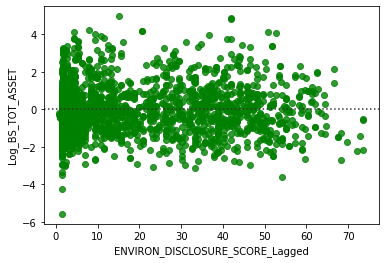

In [69]:
# Using residual plot to check the assumption of Nonnormality of Residuals

figure4a = sns.residplot(x = "ENVIRON_DISCLOSURE_SCORE_Lagged", 
                         y = "Log_BS_TOT_ASSET", data = df_no_outliers, color = "green").get_figure()

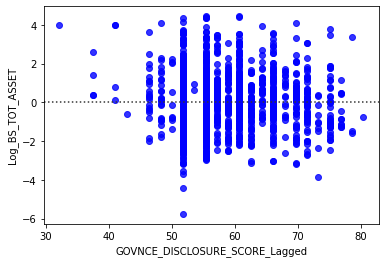

In [70]:
figure4b = sns.residplot(x = "GOVNCE_DISCLOSURE_SCORE_Lagged", 
                         y = "Log_BS_TOT_ASSET", data = df_no_outliers, color = "blue").get_figure()

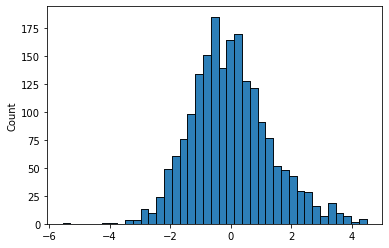

In [71]:
# Testing for any values of the explanatory variables, the dependent variable is normally distributed

model = smf.ols(formula = "Log_BS_TOT_ASSET~ENVIRON_DISCLOSURE_SCORE_Lagged + GOVNCE_DISCLOSURE_SCORE_Lagged", data = df_no_outliers).fit()

sns.histplot(model.resid)

fig4c = sns.histplot(model.resid).get_figure()

In [72]:
# Testing multicollinearity among ESG scores

vif = [variance_inflation_factor(exog = X.values, exog_idx = i) for i in range(X.shape[1])]

vif_table = pd.DataFrame({"coef_name":X.columns, "vif_values":np.around(vif, 3)})
print(vif_table)

                         coef_name  vif_values
0  ENVIRON_DISCLOSURE_SCORE_Lagged       2.204
1   GOVNCE_DISCLOSURE_SCORE_Lagged       2.204
2                            const     135.159
